In [ ]:
!pip install -U langchain-community langchain langchain_experimental openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [ ]:
from langchain.chat_models import ChatOpenAI
import config

llm = ChatOpenAI(openai_api_key=config.API_KEY,temperature=0.0, model="gpt-4o-2024-08-06")
llm

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:151: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7c8b2ba1d420>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7c8b2ba1f520>, model_name='gpt-4o-2024-08-06', temperature=0.0, openai_api_key='sk-proj-4ddHgqIpePuG4PwKiU09T3BlbkFJSstRy8nGJDXrw9SBpvN8', openai_proxy='')

In [ ]:
from langchain.tools import Tool
from langchain.llms import OpenAI
from langchain.agents import initialize_agent, AgentType

# Step 1: Define a simple function
def multiply_tool_func(input):
    # Parse the input to extract the two integers
    numbers = input.split()
    a = int(numbers[0])
    b = int(numbers[1])
    return a * b


In [ ]:

multiply_tool = Tool(
    name="MultiplyNumbers",
    func=multiply_tool_func,
    description="Multiplies two numbers a and b. Input should be two space-separated integers."
)



In [ ]:
tools = [multiply_tool]
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.CONVERSATIONAL_REACT_DESCRIPTION, # generate both reasoning traces and task-specific actions in a dynamic and interleaved manner
    #ReAct might initiate multiple search actions, each potentially being a call to an external tool.
    verbose=True
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:151: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 1.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


In [ ]:
# Query the agent
query = "What is the result of multiplying 6 and 7?"
response = agent.run(query)
print(response)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:151: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
To find the result of multiplying 6 and 7, I need to perform a multiplication operation.

Action: MultiplyNumbers
Action Input: 6 7
Observation: 42
Thought:I now know the final answer.
Final Answer: The result of multiplying 6 and 7 is 42.

> Finished chain.
The result of multiplying 6 and 7 is 42.


In [ ]:
def add_tool_func(input) :
    # Parse the input to extract the two integers
    numbers = input.split()
    a = int(numbers[0])
    b = int(numbers[1])
    return a + b

add_tool = Tool(
    name="AddNumbers",
    func=add_tool_func,
    description="Adds two numbers a and b. Input should be two space-separated integers."
)

In [ ]:
tools = [multiply_tool, add_tool]
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.CONVERSATIONAL_REACT_DESCRIPTION, # generate both reasoning traces and task-specific actions in a dynamic and interleaved manner
    #ReAct might initiate multiple search actions, each potentially being a call to an external tool.
    verbose=True
)

In [ ]:
query_multiply = "What is the result of multiplying 6 and 7?"
response_multiply = agent.run(query_multiply)
print("Multiply Result:", response_multiply)




> Entering new AgentExecutor chain...
I need to multiply the two numbers 6 and 7 to find the result.
Action: MultiplyNumbers
Action Input: 6 7
Observation: 42
Thought:I now know the final answer.
Final Answer: The result of multiplying 6 and 7 is 42.

> Finished chain.
Multiply Result: The result of multiplying 6 and 7 is 42.


In [ ]:

query_addition = "add 6 and 7?"
response_addition = agent.run(query_addition)
print("Addition Result:", response_addition)



> Entering new AgentExecutor chain...
I need to add the two numbers 6 and 7.
Action: AddNumbers
Action Input: 6 7
Observation: 13
Thought:I now know the final answer.
Final Answer: 13

> Finished chain.
Addition Result: 13


In [ ]:

query_addition = "add six and seven?"
response_addition = agent.run(query_addition)
print("Addition Result:", response_addition)



> Entering new AgentExecutor chain...
To find the sum of six and seven, I need to add the two numbers together.

Action: AddNumbers
Action Input: 6 7
Observation: 13
Thought:I now know the final answer.
Final Answer: 13

> Finished chain.
Addition Result: 13


In [ ]:

query_addition = "subtract six and seven?"
response_addition = agent.run(query_addition)
print("Addition Result:", response_addition)



> Entering new AgentExecutor chain...
To find the result of subtracting six and seven, I need to perform the operation 6 - 7. However, I don't have a tool for subtraction directly. I can think of subtraction as adding a negative number. So, 6 - 7 is the same as 6 + (-7).

Action: AddNumbers
Action Input: 6 -7
Observation: -1
Thought:I now know the final answer. 

Final Answer: The result of subtracting six and seven is -1.

> Finished chain.
Addition Result: The result of subtracting six and seven is -1.


In [ ]:

def get_weather(location):
    # Mock response; replace with actual API call
    return f"The weather in {location} is sunny with a temperature of 25°C."

weather_tool = Tool(
    name="GetWeather",
    func=get_weather,
    description="Provides the weather information for a given location. Input should be name of a location. Return the weather information directly without performing any further actions."
)

In [ ]:
from langchain.prompts import PromptTemplate

# List of tools the agent can use
tools = [weather_tool]
# Define the custom prompt template with agent_scratchpad included
prompt = PromptTemplate(
    input_variables=["input", "agent_scratchpad"],  # Ensure agent_scratchpad is included

    #The agent_scratchpad is where we add every thought or action the agent has already performed.
    #All thoughts and actions (within the current agent executor chain) can then be accessed by the next thought-action-observation loop, enabling continuity in agent actions.

    template="""
"You are an assistant that can answer questions directly or use tools when necessary. "
                   "If a question requires specific information, like weather details, extract the necessary "
                   "information (such as location) and use the appropriate tool. Otherwise, answer directly."

{agent_scratchpad}

Question: {input}
Answer:"""
)

# Initialize the agent with the custom prompt template
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.CONVERSATIONAL_REACT_DESCRIPTION,
    prompt_template=prompt,
    verbose=True,
    handle_parsing_errors=True
)

In [ ]:
query_general = "Who is the President of the United States?"
response_general = agent.run(query_general)
print("Agent:", response_general)




> Entering new AgentExecutor chain...
I know that the current President of the United States is Joe Biden. 

Final Answer: Joe Biden is the President of the United States.

> Finished chain.
Agent: Joe Biden is the President of the United States.


In [ ]:
while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit"]:
        print("Goodbye!")
        break

    response_general = agent.run(user_input)
    print("Agent:", response_general)


You: who is the president of united states. United states is having cold weather.


> Entering new AgentExecutor chain...
I don't need to use the GetWeather tool to answer the question about the president of the United States. The current president of the United States is Joe Biden. 

Final Answer: The president of the United States is Joe Biden.

> Finished chain.
Agent: The president of the United States is Joe Biden.
You: weather of delhi


> Entering new AgentExecutor chain...
To find the weather of Delhi, I need to use the GetWeather tool. 
Action: GetWeather
Action Input: Delhi
Observation: The weather in Delhi is sunny with a temperature of 25°C.
Thought:I now know the final answer. 
Final Answer: The weather in Delhi is sunny with a temperature of 25°C.

> Finished chain.
Agent: The weather in Delhi is sunny with a temperature of 25°C.
You: cm of delhi?


> Entering new AgentExecutor chain...
The question seems to be asking for the current weather conditions in Delhi, specifica

In [ ]:
from langchain.chains import LLMChain

# Create a prompt template for deciding whether to use a tool
decision_prompt = PromptTemplate(
    input_variables=["query"],
    template=(
        "If the query requires specific information about weather, return 'True'. Otherwise, return the answer based on what is asked in the question.\n\n"
        "Do not return anything else other than true if the query is asking about the weather"
        "Query: {query}\nAnswer:"
    )
)

# Create an LLMChain for the decision
decision_chain = LLMChain(llm=llm, prompt=decision_prompt)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:151: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


In [ ]:
def should_use_tool(query):
    decision = decision_chain.run(query).strip().lower()
    print(decision)
    return decision.lower().strip()

In [ ]:
def custom_agent(query) :
    response_llm=should_use_tool(query)
    if (response_llm=='true'):
        # Initialize the agent with the tools
        agent = initialize_agent(
            tools=[weather_tool],
            llm=llm,
            agent_type=AgentType.CONVERSATIONAL_REACT_DESCRIPTION,
            verbose=True
        )
        # Run the query through the agent
        response = agent.run(query)
    else:
        print("getting answer directly from llm")
        # Use LLM directly if no tool is needed
        #response = llm.generate([query]).generations[0][0].text.strip()
        response=response_llm

    return response

In [ ]:
# Example where the LLM should decide not to use a tool
query_general = "Who is the President of the United States?"
response_general = custom_agent(query_general)
print("Agent:", response_general)

# Example where the LLM should decide to use a tool
query_weather = "What is the weather in Delhi?"
response_weather = custom_agent(query_weather)
print("Agent:", response_weather)



as of my last update, the president of the united states is joe biden.
getting answer directly from llm
Agent: as of my last update, the president of the united states is joe biden.
true


> Entering new AgentExecutor chain...
I should use the GetWeather tool to find the current weather in Delhi. 
Action: GetWeather
Action Input: Delhi
Observation: The weather in Delhi is sunny with a temperature of 25°C.
Thought:I now know the final answer. 
Final Answer: The weather in Delhi is sunny with a temperature of 25°C.

> Finished chain.
Agent: The weather in Delhi is sunny with a temperature of 25°C.


In [ ]:
while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit"]:
        print("Goodbye!")
        break

    response_general = custom_agent(user_input)
    print("Agent:", response_general)

You: who's the president of united states?
as of my last update, the president of the united states is joe biden.
getting answer directly from llm
Agent: as of my last update, the president of the united states is joe biden.
You: what's the weather of delhi?
true


> Entering new AgentExecutor chain...
To find out the weather in Delhi, I need to use the GetWeather tool. 

Action: GetWeather
Action Input: Delhi
Observation: The weather in Delhi is sunny with a temperature of 25°C.
Thought:I now know the final answer. 
Final Answer: The weather in Delhi is sunny with a temperature of 25°C.

> Finished chain.
Agent: The weather in Delhi is sunny with a temperature of 25°C.
You: CM of delhi
the cm of delhi is arvind kejriwal.
getting answer directly from llm
Agent: the cm of delhi is arvind kejriwal.
You: cm of delhi
the query does not require specific information about weather. the chief minister (cm) of delhi is arvind kejriwal.
getting answer directly from llm
Agent: the query does not 

In [ ]:
from langchain.memory import ConversationBufferMemory


# Initialize the memory
memory = ConversationBufferMemory(memory_key="chat_history")

agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.CONVERSATIONAL_REACT_DESCRIPTION,
    prompt_template=prompt,
    memory=memory,
    verbose=True,
    handle_parsing_errors=True
)

In [ ]:
# Example interactions with the agent
query1 = "What is the weather in Delhi?"
response1 = agent.run(query1)
print("Agent:", response1)

query2 = "And what about New York?"
response2 = agent.run(query2)
print("Agent:", response2)

query3 = "how far is the moon from earth"
response3 = agent.run(query3)
print("Agent:", response2)



> Entering new AgentExecutor chain...
I should use the GetWeather tool to find the current weather in Delhi. 
Action: GetWeather
Action Input: Delhi
Observation: The weather in Delhi is sunny with a temperature of 25°C.
Thought:I now know the final answer. 
Final Answer: The weather in Delhi is sunny with a temperature of 25°C.

> Finished chain.
Agent: The weather in Delhi is sunny with a temperature of 25°C.


> Entering new AgentExecutor chain...
To answer the question about New York, I need to determine what specific information is being requested. Since I have access to a tool that provides weather information, it's likely that the question is about the current weather in New York. 

Action: GetWeather
Action Input: New York
Observation: The weather in New York is sunny with a temperature of 25°C.
Thought:I now know the final answer. 

Final Answer: The current weather in New York is sunny with a temperature of 25°C.

> Finished chain.
Agent: The current weather in New York is s

In [ ]:
print(memory.buffer)

Human: What is the weather in Delhi?
AI: The weather in Delhi is sunny with a temperature of 25°C.
Human: And what about New York?
AI: The current weather in New York is sunny with a temperature of 25°C.
Human: how far is the moon from earth
AI: The average distance from the Earth to the Moon is approximately 384,400 kilometers (238,855 miles).


In [ ]:
!gdown 18eLwWy0rmK4BQJxL1bJkxcItKrl1jL6v

Downloading...
From: https://drive.google.com/uc?id=18eLwWy0rmK4BQJxL1bJkxcItKrl1jL6v
To: /content/Bank-Records.csv
100% 837k/837k [00:00<00:00, 46.1MB/s]


In [ ]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_csv_agent


In [ ]:
agent_executer = create_csv_agent(llm, "Bank-Records.csv", verbose=True,
    allow_dangerous_code=True)

In [ ]:
agent_executer.run("how many people have credit score more than 500")



> Entering new AgentExecutor chain...
Thought: To find out how many people have a credit score greater than 500, I need to filter the dataframe for rows where the 'CreditScore' column is greater than 500 and then count the number of such rows.
Action: python_repl_ast
Action Input: (df['CreditScore'] > 500).sum()9357I now know the final answer.
Final Answer: There are 9,357 people with a credit score greater than 500.

> Finished chain.


'There are 9,357 people with a credit score greater than 500.'

In [ ]:
import pandas as pd
df=pd.read_csv('Bank-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
print(df[df['CreditScore'] > 500]['CustomerId'].count())

9357


In [ ]:
agent_executer.run("how many people have credit score >500 in Spain")



> Entering new AgentExecutor chain...
Thought: To find out how many people have a credit score greater than 500 in Spain, I need to filter the dataframe for rows where the 'CreditScore' is greater than 500 and the 'Geography' is 'Spain'. Then, I will count the number of such rows.
Action: python_repl_ast
Action Input: len(df[(df['CreditScore'] > 500) & (df['Geography'] == 'Spain')])2339I now know the final answer.
Final Answer: There are 2339 people with a credit score greater than 500 in Spain.

> Finished chain.


'There are 2339 people with a credit score greater than 500 in Spain.'

In [ ]:
print(df[(df['CreditScore'] > 500) & (df['Geography'] == 'Spain')].shape[0])

2339


In [ ]:
agent_executer.run("give details about the person with highest balance")



> Entering new AgentExecutor chain...
To find the details of the person with the highest balance, I need to identify the row in the dataframe `df` where the `Balance` column has its maximum value. Let's proceed with this.

Thought: I will find the row with the maximum balance and display its details.
Action: python_repl_ast
Action Input: df.loc[df['Balance'].idxmax()]RowNumber                  2093
CustomerId             15757408
Surname                      Lo
CreditScore                 655
Geography                 Spain
Gender                     Male
Age                          38
Tenure                        3
Balance               250898.09
NumOfProducts                 3
HasCrCard                     0
IsActiveMember                1
EstimatedSalary         81054.0
Exited                        1
Complain                      1
Satisfaction Score            1
Card Type                SILVER
Point Earned                336
Name: 2092, dtype: objectI now know the final answer

'The person with the highest balance is:\n\n- RowNumber: 2093\n- CustomerId: 15757408\n- Surname: Lo\n- CreditScore: 655\n- Geography: Spain\n- Gender: Male\n- Age: 38\n- Tenure: 3\n- Balance: 250898.09\n- NumOfProducts: 3\n- HasCrCard: 0\n- IsActiveMember: 1\n- EstimatedSalary: 81054.0\n- Exited: 1\n- Complain: 1\n- Satisfaction Score: 1\n- Card Type: SILVER\n- Point Earned: 336'

In [ ]:
agent_executer.run("what is the average points earned for different card types")



> Entering new AgentExecutor chain...
Thought: To find the average points earned for different card types, I need to group the dataframe by the 'Card Type' column and then calculate the mean of the 'Point Earned' column for each group.
Action: python_repl_ast
Action Input: df.groupby('Card Type')['Point Earned'].mean()Card Type
DIAMOND     605.983646
GOLD        607.235811
PLATINUM    608.839679
SILVER      604.002804
Name: Point Earned, dtype: float64I now know the final answer.

Final Answer: The average points earned for different card types are as follows:
- DIAMOND: 605.98
- GOLD: 607.24
- PLATINUM: 608.84
- SILVER: 604.00

> Finished chain.


'The average points earned for different card types are as follows:\n- DIAMOND: 605.98\n- GOLD: 607.24\n- PLATINUM: 608.84\n- SILVER: 604.00'



> Entering new AgentExecutor chain...
To draw a bar plot for which card type has the most exits, we need to group the data by 'Card Type' and sum the 'Exited' column to get the total number of exits for each card type. Then, we can plot this data using a bar plot. Let's proceed with these steps.

Thought: I will group the dataframe by 'Card Type', sum the 'Exited' column, and then plot the results using a bar plot.
Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt

# Group by 'Card Type' and sum the 'Exited' column
exits_by_card_type = df.groupby('Card Type')['Exited'].sum()

# Plotting
exits_by_card_type.plot(kind='bar', color='skyblue')
plt.title('Number of Exits by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Number of Exits')
plt.xticks(rotation=45)
plt.show()
```

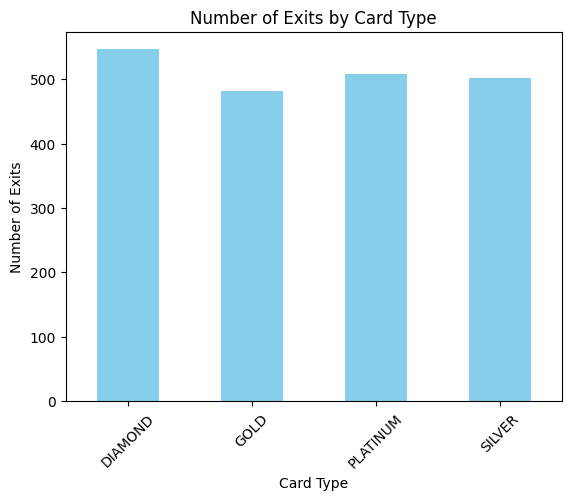

I have successfully created a bar plot showing the number of exits for each card type. The plot visually represents which card type has the most exits. 

Final Answer: A bar plot has been created to show the number of exits by card type.

> Finished chain.


'A bar plot has been created to show the number of exits by card type.'

In [ ]:
agent_executer.run("draw a bar plot for which card type has the most exits")



> Entering new AgentExecutor chain...


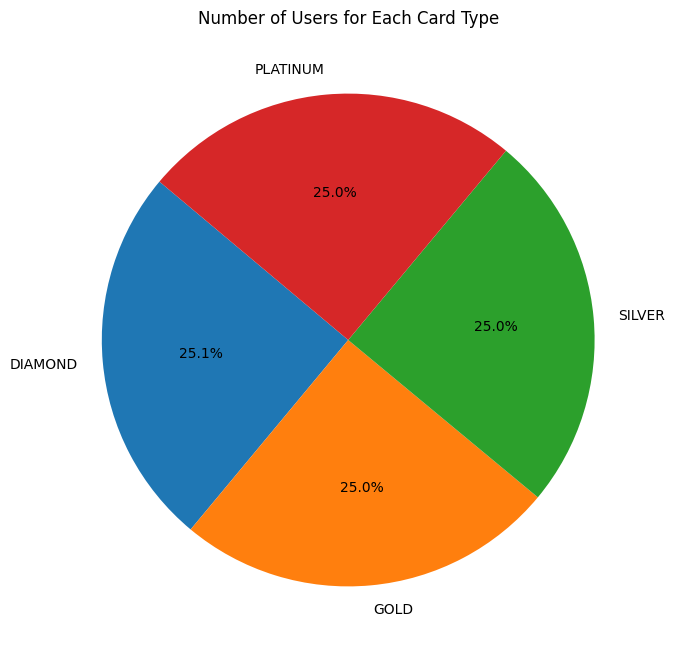

To draw a pie chart for the number of users for each card type, we need to count the occurrences of each card type in the `Card Type` column and then plot these counts as a pie chart. Let's proceed with these steps.

Thought: I will first count the number of users for each card type and then plot a pie chart using these counts.
Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt

# Count the number of users for each card type
card_type_counts = df['Card Type'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Users for Each Card Type')
plt.show()
```I have successfully generated a pie chart that shows the distribution of users for each card type. The chart visually represents the proportion of users holding each type of card. 

Final Answer: A pie chart has been drawn to show the number of users for each card type.

> Finished chain.


'A pie chart has been drawn to show the number of users for each card type.'

In [ ]:
agent_executer.run("draw a pie chart for number of users for each card type")



> Entering new AgentExecutor chain...
To draw a correlation plot between age, income, and balance, we need to calculate the correlation matrix for these columns and then visualize it using a heatmap. Let's proceed with these steps.

Thought: I will calculate the correlation matrix for the columns 'Age', 'EstimatedSalary', and 'Balance', and then plot it using a heatmap.
Action: python_repl_ast
Action Input: 
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[['Age', 'EstimatedSalary', 'Balance']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()
```

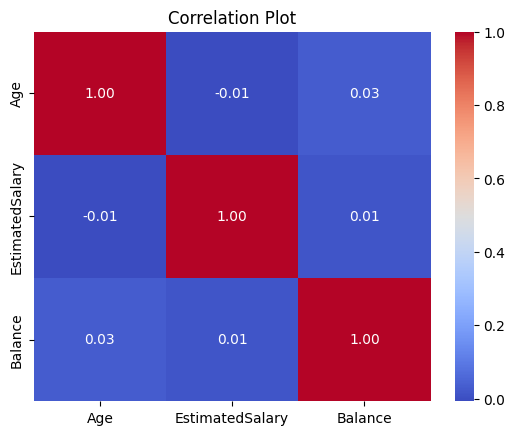

I have successfully calculated the correlation matrix and plotted the heatmap for the columns 'Age', 'EstimatedSalary', and 'Balance'. 

Final Answer: A correlation plot between age, income, and balance has been drawn using a heatmap.

> Finished chain.


'A correlation plot between age, income, and balance has been drawn using a heatmap.'

In [ ]:
agent_executer.run("draw a correlation plot between age, income, balance")



> Entering new AgentExecutor chain...
To draw a plot between the credit score and points earned, we can use the `matplotlib` library to create a scatter plot. This will help us visualize the relationship between these two variables. Let's proceed with the plotting.

Thought: I will use the `matplotlib.pyplot` library to create a scatter plot of 'CreditScore' vs 'Point Earned'.

Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['CreditScore'], df['Point Earned'], alpha=0.5)
plt.title('Credit Score vs Points Earned')
plt.xlabel('Credit Score')
plt.ylabel('Points Earned')
plt.grid(True)
plt.show()
```

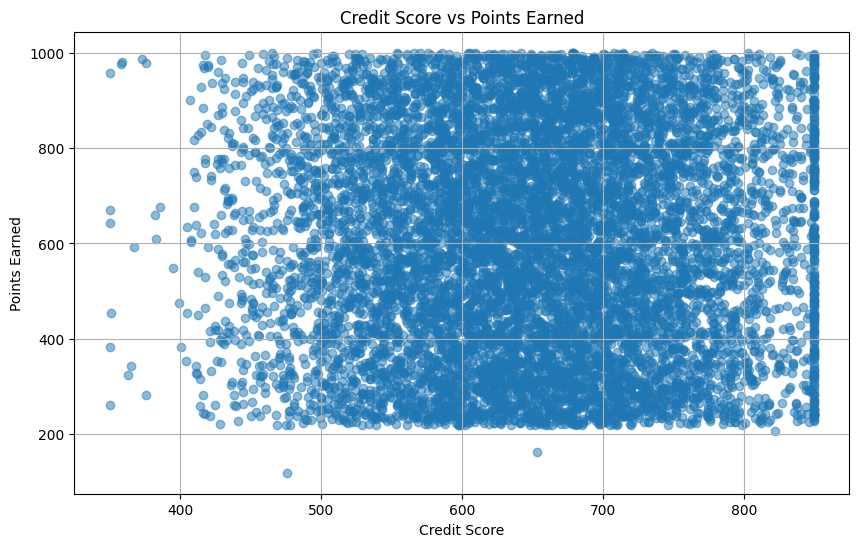

I have created a scatter plot to visualize the relationship between the credit score and points earned. The plot displays the distribution and potential correlation between these two variables.

Final Answer: A scatter plot has been created to visualize the relationship between credit score and points earned.

> Finished chain.


'A scatter plot has been created to visualize the relationship between credit score and points earned.'

In [ ]:
agent_executer.run("draw a plot between credit score vs points earned")